In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, IntSlider, FloatSlider
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
df = pd.read_csv("Agriculture Sector (1).csv")
df.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],inplace=True)
df.head(2)

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State_Name,Crop_Type,Crop,N,P,K,rainfall,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,654.34,7300.0,9400.0,1.29
1,andhra pradesh,kharif,horsegram,20,60,20,654.34,3300.0,1000.0,0.30


In [4]:
df.corr()

,N,P,K,rainfall,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
N,1.000000,0.342521,0.486650,0.111900,0.009287,0.097888,0.090222
P,0.342521,1.000000,0.210349,0.110686,-0.057514,-0.010698,0.076805
K,0.486650,0.210349,1.000000,0.369173,-0.120388,-0.026379,0.076197
rainfall,0.111900,0.110686,0.369173,1.000000,-0.135261,-0.097948,0.026491
Area_in_hectares,0.009287,-0.057514,-0.120388,-0.135261,1.000000,0.736019,-0.018287
Production_in_tons,0.097888,-0.010698,-0.026379,-0.097948,0.736019,1.000000,0.028306
Yield_ton_per_hec,0.090222,0.076805,0.076197,0.026491,-0.018287,0.028306,1.000000


<AxesSubplot:>

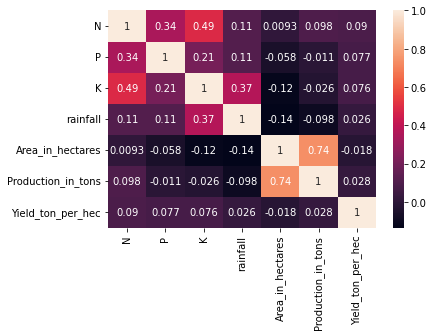

In [5]:

sns.heatmap(df.corr(),annot=True)

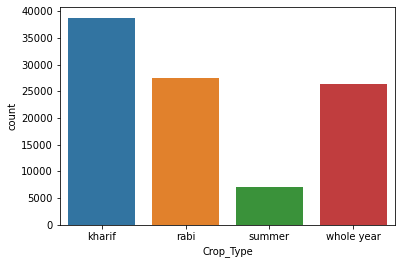

In [6]:
sns.countplot(x=df['Crop_Type'],);

In [7]:
data=df.select_dtypes("number")


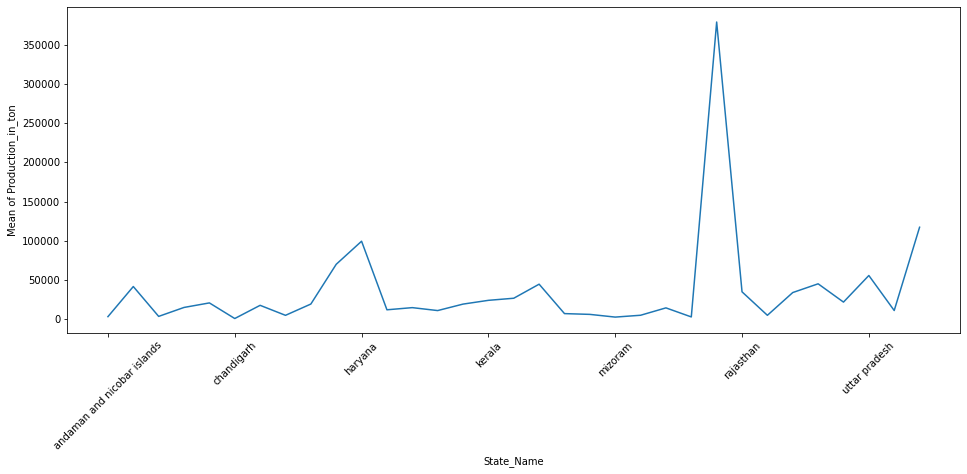

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
df.groupby('State_Name')['Production_in_tons'].mean().plot(kind="line", ax=ax,ylabel='Mean of Production_in_ton')
plt.xticks(rotation=45);

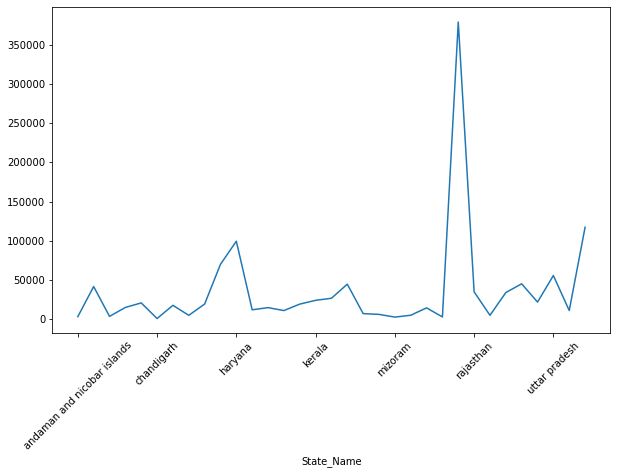

In [34]:
plt.figure(figsize=(10,6))
df.groupby('State_Name')['Production_in_tons'].mean().plot(kind="line")
plt.xticks(rotation=45);

In [35]:
# df['Area_in_hectares'].plot(kind='pie')

In [36]:
X = df[['N', 'P', 'K', 'rainfall',
       'Area_in_hectares']]
y = df['Production_in_tons']

## Machine Learning 

#### Linear Regression

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
lm.coef_

array([247.48542929,  -4.9600694 , 132.05656779,  -3.9478497 ,
         2.04265963])

In [41]:
lm.score(X_train,y_train)

0.5411004520015155

In [42]:
lm.predict(X_train)

array([12385.94564255, 10239.43355975,  2479.14333299, ...,
       44670.8951944 , 42378.85925482,  3996.116961  ])

In [43]:
y_pred_test = pd.Series(lm.predict(X_test))


In [44]:
# X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Production_in_tons   R-squared (uncentered):                   0.588
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                          2.854e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        11:01:11   Log-Likelihood:                     -1.2715e+06
No. Observations:               99849   AIC:                                  2.543e+06
Df Residuals:                   99844   BIC:                                  2.543e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [45]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                  OLS                Adj. R-squared (uncentered): 0.588       
Dependent Variable:     Production_in_tons AIC:                         2543063.4459
Date:                   2024-05-07 11:01   BIC:                         2543111.0030
No. Observations:       99849              Log-Likelihood:              -1.2715e+06 
Df Model:               5                  F-statistic:                 2.854e+04   
Df Residuals:           99844              Prob (F-statistic):          0.00        
R-squared (uncentered): 0.588              Scale:                       6.7389e+09  
--------------------------------------------------------------------------------------
                        Coef.     Std.Err.      t       P>|t|      [0.025      0.975] 
--------------------------------------------------------------------------------------
N                      216.2495     7.7964    27.7371   0.0000    200.9687    231.5304
P                     -241.2908    13.3086   -18.1305   0.0000   -267.3755   -215.2061
K                      108.2514    11.2028     9.6629   0.0000     86.2940    130.2088
rainfall                -5.6325     0.4564   -12.3419   0.0000     -6.5270     -4.7380
Area_in_hectares         2.0414     0.0059   344.3138   0.0000      2.0298      2.0531
------------------------------------------------------------------------------------
Omnibus:                148971.787          Durbin-Watson:             1.909        
Prob(Omnibus):          0.000               Jarque-Bera (JB):          166427417.129
Skew:                   8.835               Prob(JB):                  0.000        
Kurtosis:               202.225             Condition No.:             2546         
====================================================================================
* The condition number is large (3e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [46]:
X.columns

Index(['N', 'P', 'K', 'rainfall', 'Area_in_hectares'], dtype='object')

In [47]:
 def make_prediction(Nitrogen, Phos, Ka, rainfall_, Area_in_hectares_):
    data = {
       "N": Nitrogen,
        "P": Phos,
        "K": Ka,
        "rainfall": rainfall_,
        'Area_in_hectares': Area_in_hectares_
    }
    # Continue with your prediction logic here
    df1 = pd.DataFrame(data, index=[0])
        
    prediction = lm.predict(df1).round(2)[0]
    return f"Predicted crop yield: {prediction}"



Nitrogen = float(input("Enter Nitrogen: "))
Phos = float(input("Enter Phosphorus: "))
Ka = float(input("Enter Potassium: "))
rainfall_ = float(input("Enter Rainfall: "))
Area_in_hectares_ = float(input("Enter Area in Hectares: "))


# Call the function with arguments
prediction = make_prediction(Nitrogen, Phos, Ka, rainfall_, Area_in_hectares_)
print(prediction)

Enter Nitrogen: 45
Enter Phosphorus: 65
Enter Potassium: 46
Enter Rainfall: 5664156
Enter Area in Hectares: 616546
Predicted crop yield: -21100906.46


#### OR

In [48]:
def make_prediction():
    Nitrogen = float(input("Enter Nitrogen: "))
    Phos = float(input("Enter Phosphorus: "))
    Ka = float(input("Enter Potassium: "))
    rainfall_ = float(input("Enter Rainfall: "))
    Area_in_hectares_ = float(input("Enter Area in Hectares: "))

    data = {
        "N": Nitrogen,
        "P": Phos,
        "K": Ka,
        "rainfall": rainfall_,
        'Area_in_hectares': Area_in_hectares_
    }

    df1 = pd.DataFrame(data, index=[0])
        
    prediction = lm.predict(df1).round(2)[0]
    return f"Predicted crop yield: {prediction}"

print(make_prediction())


Enter Nitrogen: 765
Enter Phosphorus: 651
Enter Potassium: 65165
Enter Rainfall: 65156
Enter Area in Hectares: 45612364
Predicted crop yield: 101688919.59


In [49]:
X.columns

Index(['N', 'P', 'K', 'rainfall', 'Area_in_hectares'], dtype='object')